In [13]:
## Python packages - you may have to pip install sqlalchemy, sqlalchemy_utils, and psycopg2.

import pandas as pd
# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 30)

import numpy as np
import math
# The usual preamble
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
plt.rcParams['axes.color_cycle'] = ['r', 'g', 'b', 'c']
plt.rcParams['lines.color'] = 'r'
plt.rcParams['figure.figsize'] = (15, 5)
from matplotlib.colors import ListedColormap

import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [33]:
train_df = pd.read_csv('Insight_Train_DC.csv')
test_df = pd.read_csv('Insight_Test_DC.csv')

In [36]:
def process(df):
    df = df.dropna()
    df = df[df['FM']<0.4]
    df = df[df['DS']!=0.001]

    return df
test_df = process(test_df)
train_df = process(train_df)

In [37]:
train_df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
count,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000
mean,132.759501,0.003424,0.005255,0.004834,0.002104,0,0.000182,46.081354,1.375713,7.777910,7.845962,70.258907,93.581948,163.840855,4.032660,0.331948,137.010689,133.760095,137.590261,19.983373,0.296318,1.245843
std,9.356147,0.003973,0.029058,0.002800,0.003053,0,0.000635,16.852121,0.801090,15.950885,5.515884,37.102331,28.169714,17.297051,2.837363,0.683148,16.304475,15.711395,14.471585,28.845909,0.611407,0.584114
min,106.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,12.000000,0.200000,0.000000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.003000,0.000000,0,0.000000,31.000000,0.800000,0.000000,4.300000,39.000000,68.000000,153.000000,2.000000,0.000000,129.000000,124.000000,128.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0,0.000000,47.000000,1.300000,0.000000,7.200000,67.000000,94.500000,162.000000,4.000000,0.000000,139.000000,135.000000,139.000000,9.000000,0.000000,1.000000
75%,140.000000,0.006000,0.002000,0.007000,0.004000,0,0.000000,60.000000,1.800000,7.000000,10.400000,98.000000,119.000000,174.000000,6.000000,0.000000,148.000000,145.000000,147.000000,26.000000,1.000000,1.000000
max,160.000000,0.019000,0.375000,0.015000,0.015000,0,0.005000,84.000000,6.300000,91.000000,40.800000,180.000000,158.000000,238.000000,18.000000,8.000000,186.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [16]:
train_df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Min         float64
Max         float64
Nmax        float64
Nzeros      float64
Mode        float64
Mean        float64
Median      float64
Variance    float64
Tendency    float64
NSP         float64
dtype: object

In [24]:
train_df[train_df.columns[:10]]

,LB,AC,FM,UC,DL
0,120,0.013,0.006,0.003,0.000
1,121,0.012,0.009,0.001,0.000
2,121,0.011,0.007,0.001,0.000
3,121,0.011,0.005,0.002,0.000
4,125,0.008,0.000,0.000,0.000
5,125,0.011,0.000,0.000,0.000
6,125,0.007,0.000,0.000,0.000
7,151,0.000,0.000,0.006,0.006
8,151,0.000,0.000,0.008,0.005
9,151,0.000,0.000,0.006,0.006


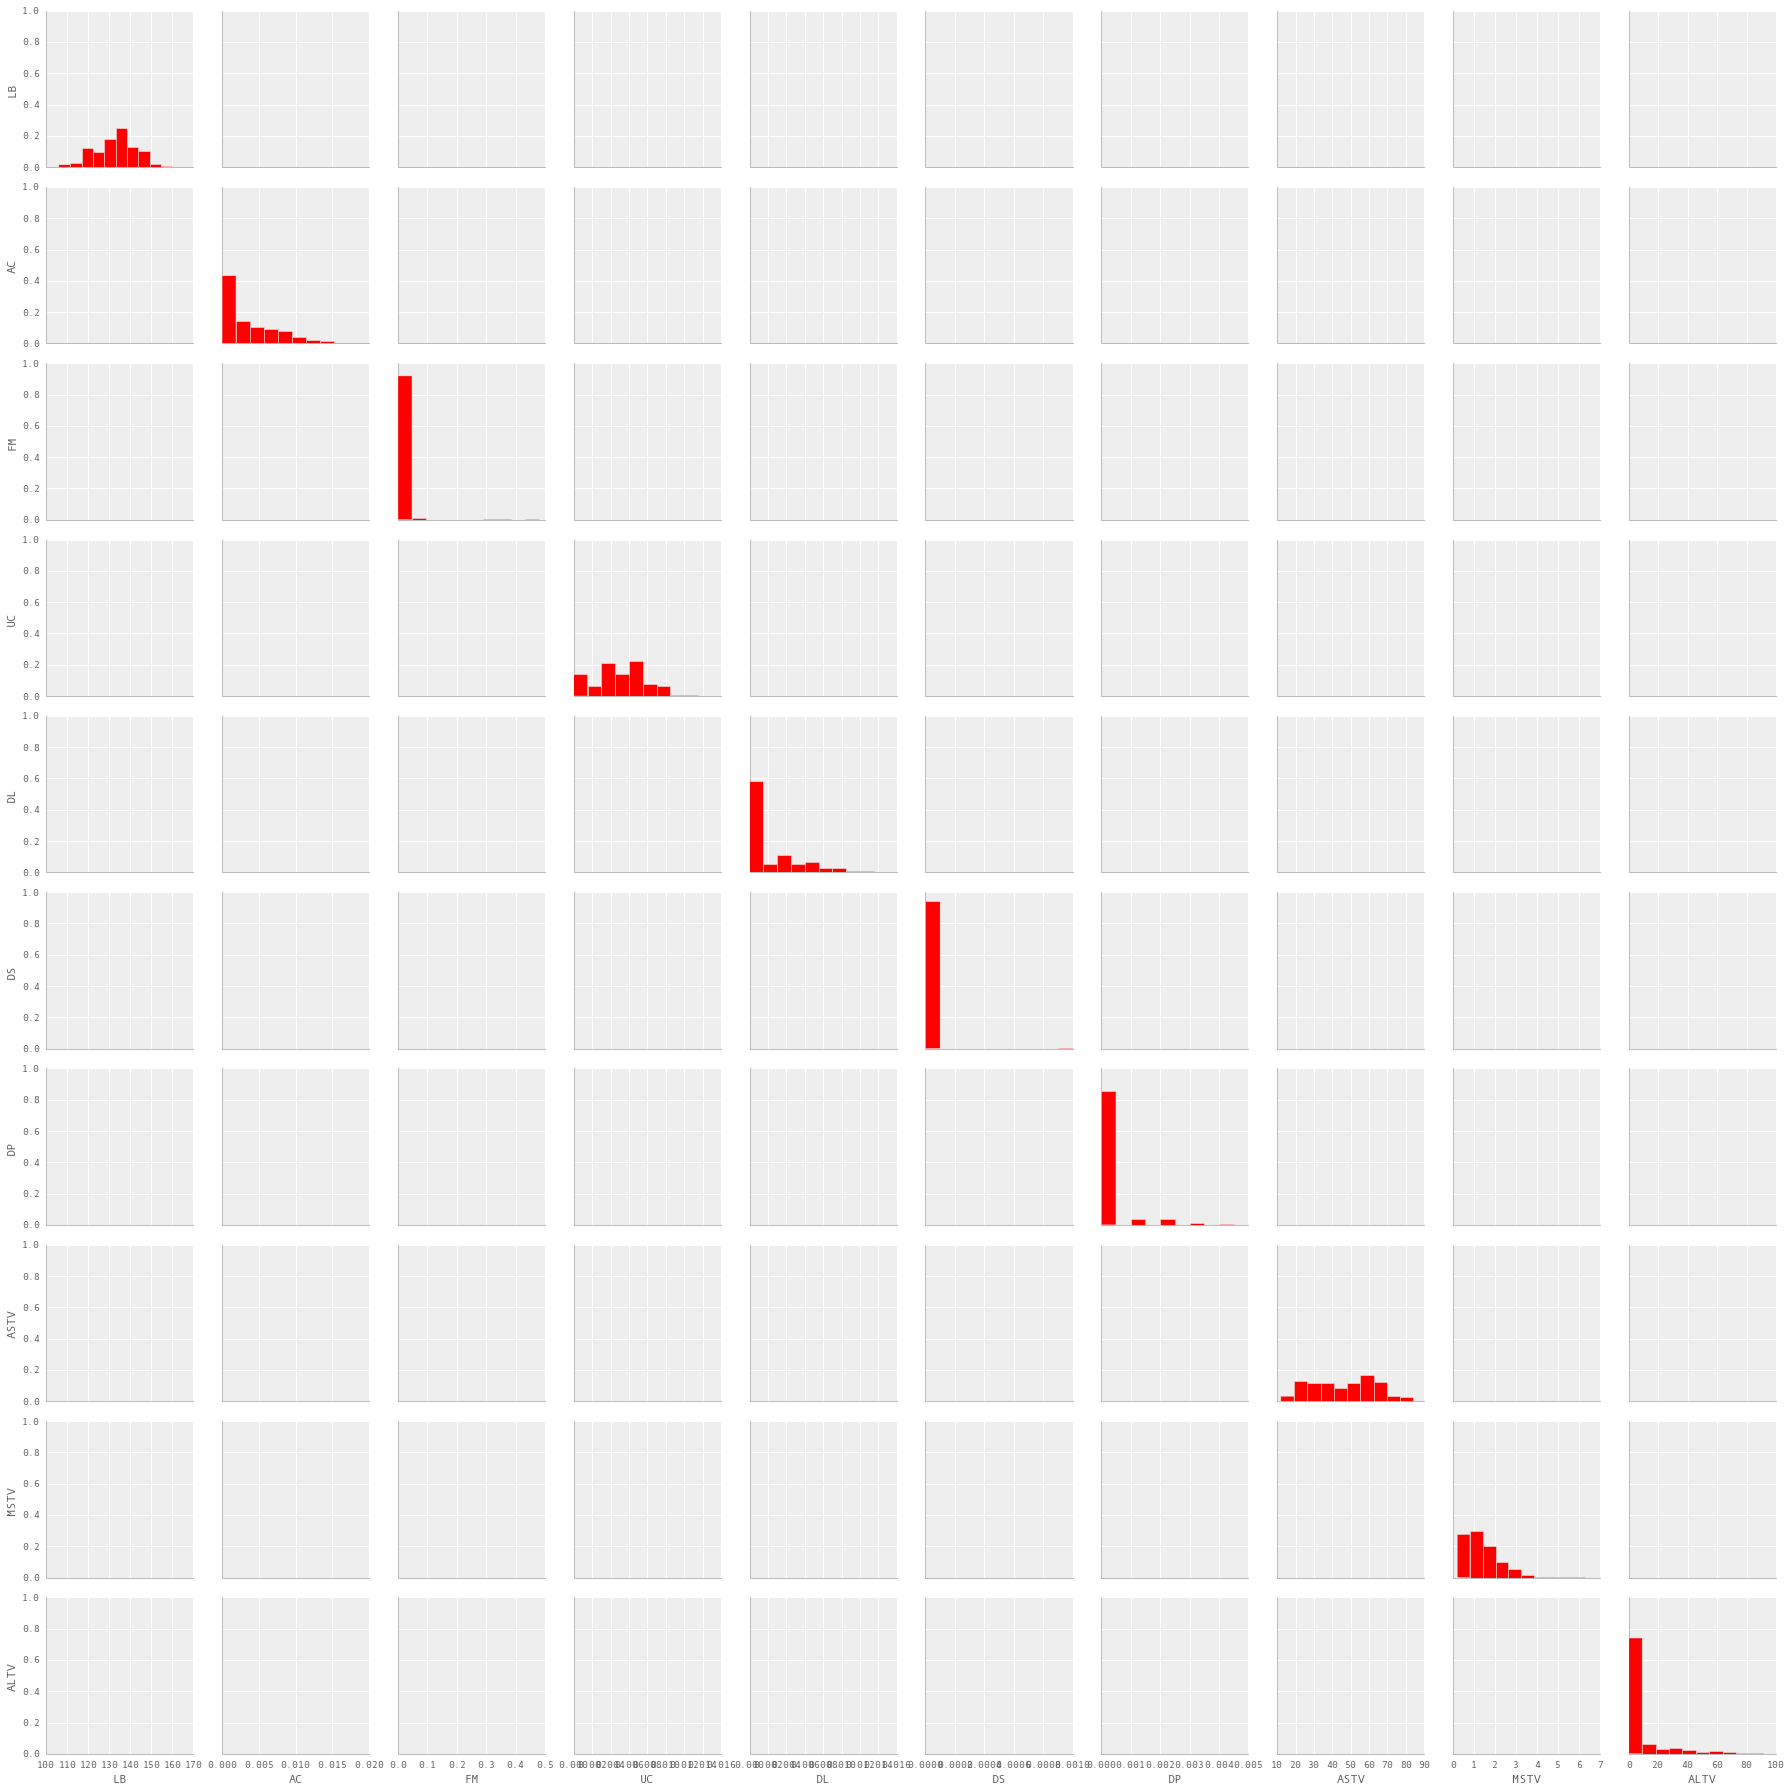

In [27]:
g = sns.PairGrid(train_df[train_df.columns[:10]]) #,hue='is_malignant')
g.map_diag(plt.hist)
#g.map_offdiag(plt.scatter);


In [38]:

def get_Xy(df,label_col='NSP'):
    return df.drop(label_col,1).as_matrix(),\
           df[label_col].as_matrix()
train_X, train_y = get_Xy(train_df)
test_X, test_y = get_Xy(test_df)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.grid_search import RandomizedSearchCV
scaler = StandardScaler()
clf = RandomForestClassifier(n_estimators=100)
params = {'min_samples_split': np.linspace(1,10,10),
          'min_samples_leaf': np.linspace(1,5,5),
          'max_features': [1,'sqrt','log2']
         }
cv = RandomizedSearchCV(clf,params,n_jobs=2,cv=10,n_iter=20)
pipe = Pipeline([('scaler',scaler),('cv',cv)])
pipe.fit(train_X,train_y)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('cv', RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
   ...        pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring=None, verbose=0))])

In [45]:
pipe.score(train_X,train_y)

0.97268408551068886

In [46]:
pipe.score(test_X,test_y)

0.83175355450236965

In [47]:
pred_y = pipe.predict(test_X)
from sklearn.metrics import classification_report
classification_report(test_y,pred_y)

'             precision    recall  f1-score   support\n\n          1       0.82      0.98      0.89       242\n          2       0.83      0.67      0.75       141\n          3       1.00      0.49      0.66        39\n\navg / total       0.84      0.83      0.82       422\n'